Importing python packages

In [43]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [44]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

Importing the master Form A dataset (variables extracted for main GUSTO cohort and IVF cohort)

In [45]:
file = '/home/mukkesh/Manuscript1_final/FormA392_20191206.xlsx'
df = pd.read_excel(file, index_col = "SubjectID")

Inspecting the dataset

In [46]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                        float64
bw_percentile_Lancet2011                                    float64
size_at_birth_Lancet2011                                     object
LGA_Lancet2011_bin                                          float64
children_at_home                                             object
working_situation                                            object
childcare_arr_1                                              object
childcare_arr_1_specify                                      object
childcare_arr_1_recoded                                      object
childcare_arr_2                                              object
childcare_arr_2_specify                                      object
childcare_arr_2_recoded                                      object
childcare_arr_3                                              object
childcare_arr_3_specify                                      object
childcare_arr_3_recoded                         

In [47]:
df.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04002                 -0.28                     39.05   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04010                 -0.77                     22.08   
010-04011                 -0.30                     38.33   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04002                      AGA                 0.0              NaN   
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04010                      AGA                 0.0              NaN   
010-04011                      AGA                 0.0              NaN   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04002               NaN             NaN                     NaN   
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04010               NaN             NaN                     NaN   
010-04011               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04002                     NaN                         8.0   
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04010                     NaN                         9.0   
010-04011                     NaN                         7.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04002                  0_no                           0.0            NaN   
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04010                 1_yes                           1.0          1_yes   
010-04011                 1_yes                           1.0           0_no   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04002     no_contraception                           NaN   
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04010                  NaN                           NaN   
010-04011                  NaN                           NaN   

          con

Removing subjects who self-reported Type 2 Diabetes (T2D) at pregnancy week 11

In [48]:
df.drop(['010-20008', '010-20191', '010-20224'], inplace=True)

Removing Subject ID 010-21272 (mother is of other ethnicity, Mother is Indian Muslim (IC says Indian race and Malay dialect) and genetic PCA positions her in between Malay and Indian cluster

In [49]:
df.drop(['010-21272'], inplace=True)

In [50]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                 1174
bw_percentile_Lancet2011                             1174
size_at_birth_Lancet2011                             1174
LGA_Lancet2011_bin                                   1174
children_at_home                                     1340
working_situation                                     705
childcare_arr_1                                       435
childcare_arr_1_specify                                32
childcare_arr_1_recoded                               435
childcare_arr_2                                       435
childcare_arr_2_specify                                41
childcare_arr_2_recoded                               435
childcare_arr_3                                       435
childcare_arr_3_specify                                14
childcare_arr_3_recoded                               435
number_weeks_been_pregnant                           1192
was_pregnancy_planned                                1204
was_pregnancy_

GDM status in GUSTO original dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [51]:
df['m_gdm_who_1999'].value_counts(dropna=False)

No     939
NaN    298
Yes    223
Name: m_gdm_who_1999, dtype: int64

Calculating the prevalence of GDM (%) in original dataset

In [52]:
(223/(939+223))*100

19.19104991394148

Plotting the distribution of gestational age when antenatal OGTT was performed

/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


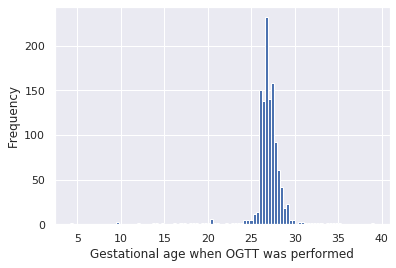

In [53]:
plt.hist(df['m_ogtt_gestationalweek'], 100)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga', dpi=100)
plt.show()

In [54]:
df['m_ogtt_gestationalweek'].describe()

count    1162.000000
mean       26.833029
std         2.129868
min         4.140000
25%        26.430000
50%        26.860000
75%        27.570000
max        39.140000
Name: m_ogtt_gestationalweek, dtype: float64

In [55]:
df_24wks = df[df['m_ogtt_gestationalweek'] < 24]
print(df_24wks.shape)

(36, 1557)


In [56]:
df_29wksogtt = df[df['m_ogtt_gestationalweek'] >= 29]
print(df_29wksogtt.shape)

(54, 1557)


Removing subjects who are less than 24 weeks or more than 29 weeks of gestational age when OGTT was performed

In [57]:
df = df.drop(df[(df.m_ogtt_gestationalweek < 24)].index)
df = df.drop(df[(df.m_ogtt_gestationalweek >= 29)].index)

In [58]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 16.3+ MB


bw_zscore_Lancet2011                                 1088
bw_percentile_Lancet2011                             1088
size_at_birth_Lancet2011                             1088
LGA_Lancet2011_bin                                   1088
children_at_home                                     1258
working_situation                                     658
childcare_arr_1                                       406
childcare_arr_1_specify                                31
childcare_arr_1_recoded                               406
childcare_arr_2                                       406
childcare_arr_2_specify                                38
childcare_arr_2_recoded                               406
childcare_arr_3                                       406
childcare_arr_3_specify                                13
childcare_arr_3_recoded                               406
number_weeks_been_pregnant                           1107
was_pregnancy_planned                                1116
was_pregnancy_

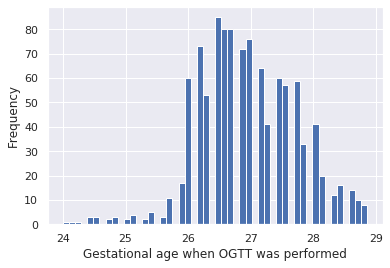

In [59]:
plt.hist(df['m_ogtt_gestationalweek'], 50)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga_2428', dpi=100)
plt.show()

In [60]:
df['m_ogtt_gestationalweek'].describe()

count    1072.000000
mean       26.938293
std         0.784757
min        24.000000
25%        26.430000
50%        26.860000
75%        27.570000
max        28.860000
Name: m_ogtt_gestationalweek, dtype: float64

In [61]:
df.rename(columns=
          {'PAI-1': 'PAI1', 'MCP-1': 'MCP1', 'IGF-I': 'IGFI', 'IGF-II': 'IGFII', 'IGFBP-1': 'IGFBP1', 'IGFBP-3': 'IGFBP3', 'IGFBP-7': 'IGFBP7', 'C-Peptide': 'CPeptide', 'IGFBP-4': 'IGFBP4'}, inplace=True)

Importing scikit-learn machine learning packages and modules

In [62]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statistics import mean, stdev
from sklearn.externals import joblib

Multiethnic model (Chinese, Malay, Indian)

In [63]:
df1=df.dropna(subset=['map_est_first_antenatal', 'mother_age_recruitment', 'pw11_any_gdm_outcome_cat', 'm_ethnicity_malay_bin', 'm_height_pw26', 'Adiponectin', 'IGFI', 'm_HEI_dairy_pw26', 'm_HEI_total_grains&_tubers_pw26', 'm_gdm_who_1999_cat'])


In [64]:
df1.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04020                  0.34                     63.40   
010-04022                  0.63                     73.61   
010-04023                  2.08                     98.12   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04020                      AGA                 0.0             0_no   
010-04022                      AGA                 0.0            1_yes   
010-04023                      LGA                 1.0             0_no   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04020               NaN             NaN                     NaN   
010-04022         stay_home             NaN                     NaN   
010-04023               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04020                     NaN                         5.0   
010-04022                     NaN                         6.0   
010-04023                     NaN                         2.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04020                  0_no                           0.0            NaN   
010-04022                 1_yes                           1.0           0_no   
010-04023                 1_yes                           1.0          1_yes   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04020     no_contraception                           NaN   
010-04022                  NaN                           NaN   
010-04023                  NaN                           NaN   

          con

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 10.8+ MB


Drop rows of pandas dataframe whose value is NaN 

In [66]:
df2 = df1[['map_est_first_antenatal', 'mother_age_recruitment', 'pw11_any_gdm_outcome_cat', 'm_ethnicity_malay_bin', 'm_HEI_dairy_pw26', 'm_gdm_who_1999_cat']]


In [67]:
df2.head()

,map_est_first_antenatal,mother_age_recruitment,pw11_any_gdm_outcome_cat,m_ethnicity_malay_bin,m_HEI_dairy_pw26,m_gdm_who_1999_cat
SubjectID,,,,,,
010-04004,97.3,29.43,0.0,1.0,5.60,0.0
010-04006,101.3,27.53,0.0,0.0,10.00,0.0
010-04020,70.0,38.72,0.0,0.0,0.00,0.0
010-04022,92.0,35.97,0.0,0.0,10.00,1.0
010-04023,76.3,34.21,0.0,0.0,7.91,0.0


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Data columns (total 6 columns):
map_est_first_antenatal     909 non-null float64
mother_age_recruitment      909 non-null float64
pw11_any_gdm_outcome_cat    909 non-null float64
m_ethnicity_malay_bin       909 non-null float64
m_HEI_dairy_pw26            909 non-null float64
m_gdm_who_1999_cat          909 non-null float64
dtypes: float64(6)
memory usage: 49.7+ KB


GDM status in GUSTO complete dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [69]:
df2['m_gdm_who_1999_cat'].value_counts(dropna=False)

0.0    755
1.0    154
Name: m_gdm_who_1999_cat, dtype: int64

Calculating the prevalence of GDM (%) in complete dataset

In [70]:
(154/(755+154))*100

16.94169416941694

Generating a heatmap of variables

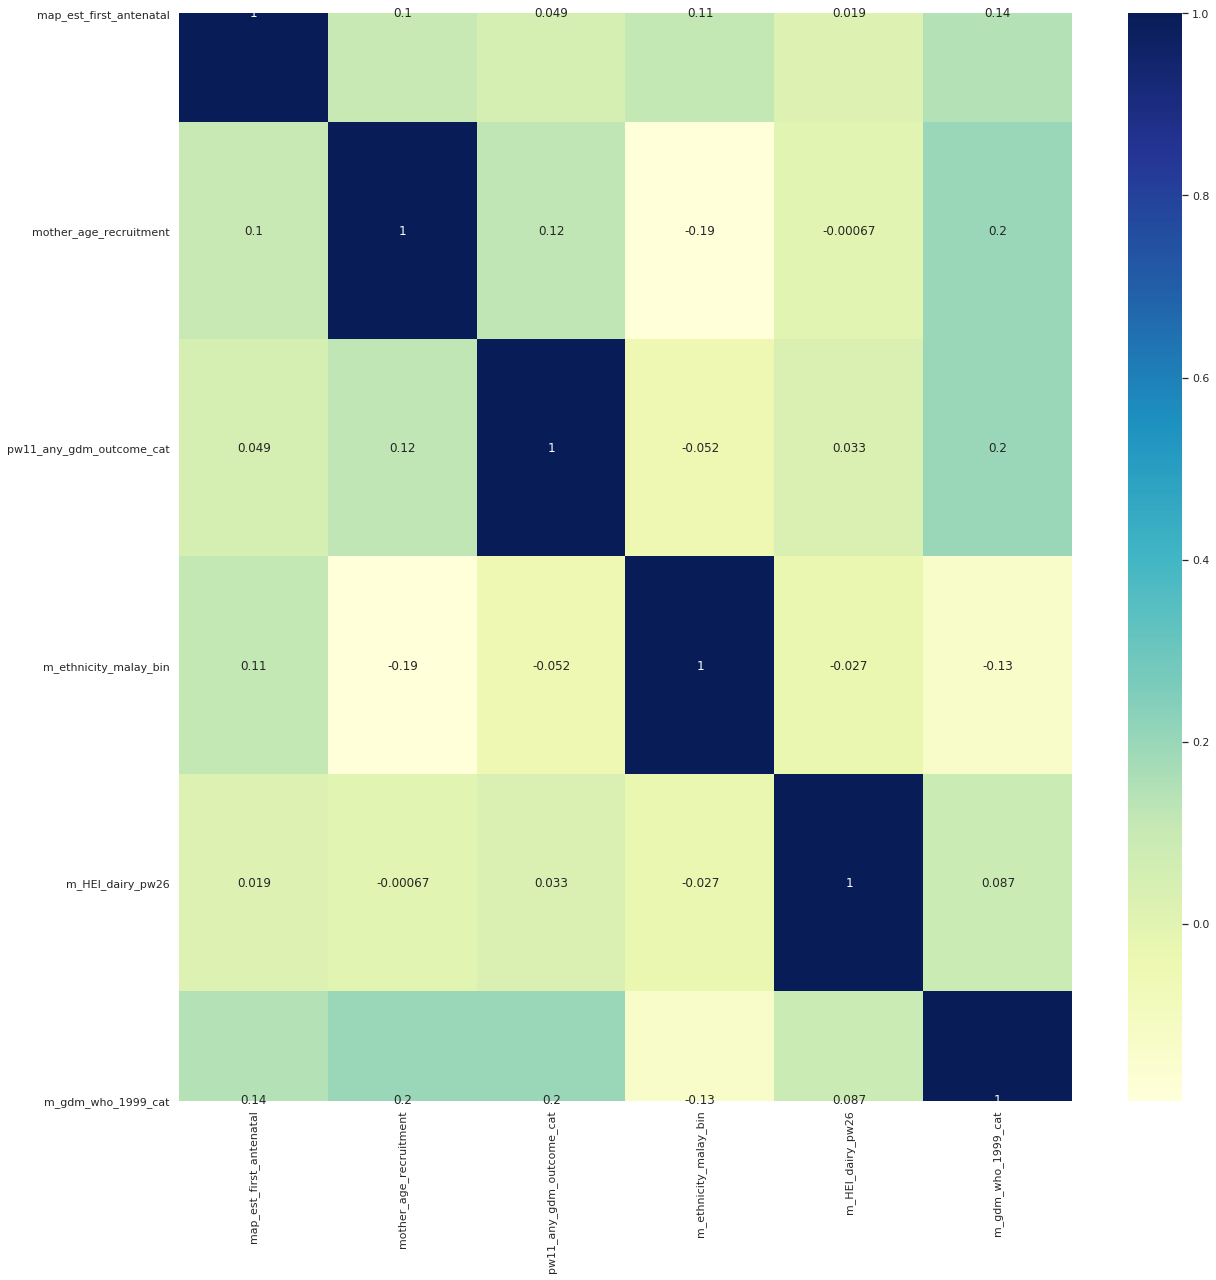

In [71]:
ax = sns.heatmap(df2.corr(method='spearman'), annot=True, cmap="YlGnBu")
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('heatmap_spearmancorr_ni4f_di', bbox_inches='tight', dpi=300)

Generating X & Y matrices

In [72]:
X=df2.loc[:, df2.columns != 'm_gdm_who_1999_cat']
y=df2.loc[:, df2.columns == 'm_gdm_who_1999_cat']

Create the Support Vector Machine classifier object

In [73]:
from sklearn import svm
clf = svm.SVC()

Create the grid search parameter grid

In [74]:
clf_param_grid = {
    'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'kernel': ["poly", "rbf"],
    'degree': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'coef0': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
}

In [75]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.10, random_state=0)
grid_ni4f_di_auc_svm = GridSearchCV(estimator=clf, param_grid=clf_param_grid, scoring='roc_auc', cv=sss, verbose=1, n_jobs=-1)

Fit the estimator

In [76]:
grid_ni4f_di_auc_svm.fit(MaxAbsScaler().fit_transform(X), y)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   26.2s finished
/home/mukkesh/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mukkesh/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscale

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'coef0': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'degree': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

Compute metrics

In [77]:
AUC = grid_ni4f_di_auc_svm.best_score_

In [78]:
AUC

0.7885964912280702

In [79]:
print(grid_ni4f_di_auc_svm.best_params_)
print(grid_ni4f_di_auc_svm.best_estimator_)

{'C': 6.0, 'coef0': 5.0, 'degree': 4.0, 'kernel': 'poly'}
SVC(C=6.0, cache_size=200, class_weight=None, coef0=5.0,
    decision_function_shape='ovr', degree=4.0, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [80]:
std = grid_ni4f_di_auc_svm.cv_results_['std_test_score'][grid_ni4f_di_auc_svm.best_index_]

In [81]:
std

0.05877585742309719

In [82]:
print("AUC: %0.3f (+/- %0.3f)" % (AUC, std * 1.96))

AUC: 0.789 (+/- 0.115)


Save the best model as a 'Pickle' - saving the pickled model as a file

In [83]:
# Output a pickle file for the model
joblib.dump(grid_ni4f_di_auc_svm.best_estimator_, 'ni4f_di_auc_svm.pkl')

['ni4f_di_auc_svm.pkl']

Load the pickled model to make predictions on unseen data (in future)

In [84]:
ni4f_di_auc_svm = joblib.load('ni4f_di_auc_svm.pkl')